# Finite Volume - Transient

## For the energy equation

# $
\displaystyle \frac{\partial}{\partial t} \left( \rho c_p T \right) = \frac{\partial }{{\partial x}}\left( {k\frac{{\partial T}}{{\partial x}}} \right) + S
$

Integrating in $x$ and $t$

## $
\displaystyle \int_{t}^{t + \Delta t} \int_w^{e} \frac{\partial}{\partial t} \left( \rho c_p T \right) dx dt = \int_{t}^{t + \Delta t} \int_w^{e} {\frac{\partial }{{\partial x}}\left( {k\frac{{\partial T}}{{\partial x}}} \right)dx dt}  + \int_{t}^{t + \Delta t} \int_w^{e} {Sdxdt}
$

For the transient term,

## $
\displaystyle \int_{t}^{t + \Delta t} \int_w^{e} \frac{\partial}{\partial t} \left( \rho c_p T \right) dx dt = \rho c_p \Delta x \left( T_P^1 - T_P^0 \right)
$

For the difussive term,

## $
\displaystyle \int_{t}^{t + \Delta t} \int_w^{e} {\frac{\partial }{{\partial x}}\left( {k\frac{{\partial T}}{{\partial x}}} \right)dx dt} = \int_{t}^{t + \Delta t} \left[{\left( {k\frac{{\partial T}}{{\partial x}}} \right)_e} - {\left( {k\frac{{\partial T}}{{\partial x}}} \right)_w} \right] dt
$

## $
\displaystyle \int_{t}^{t + \Delta t} \int_w^{e} {\frac{\partial }{{\partial x}}\left( {k\frac{{\partial T}}{{\partial x}}} \right)dx dt} = \int_{t}^{t + \Delta t} \left[ {{k_e}\frac{{{T_E} - {T_P}}}{{{{\left( {\delta x} \right)}_e}}} - {k_w}\frac{{{T_P} - {T_W}}}{{{{\left( {\delta x} \right)}_w}}}} \right] dt
$

The time variation of a variable can be evaluated as

## $
\displaystyle \int_{t}^{t + \Delta t} T_P dt = \left[f T_P^1 + \left( 1 - f \right) T_P^0 \right] \Delta t
$

Then,

## $
\displaystyle \rho c_p \Delta x \left( T_P^1 - T_P^0 \right) = f \left[ {{k_e}\frac{{{T_E^1} - {T_P^1}}}{{{{\left( {\delta x} \right)}_e}}} - {k_w}\frac{{{T_P^1} - {T_W^1}}}{{{{\left( {\delta x} \right)}_w}}}} \right] \Delta t + \left( 1 - f \right) \left[ {{k_e}\frac{{{T_E^0} - {T_P^0}}}{{{{\left( {\delta x} \right)}_e}}} - {k_w}\frac{{{T_P^0} - {T_W^0}}}{{{{\left( {\delta x} \right)}_w}}}} \right] \Delta t + \bar S\Delta x \Delta t
$

Collecting terms,

$
\displaystyle  {a_P}{T_P} = {a_E}{T_E} + {a_W}{T_W} + b\\
$

where


$
\begin{array}{l}
\displaystyle {a_P} = \rho c_p \frac{\Delta x}{\Delta t} + f \frac{{{k_e}}}{{{{\left( {\delta x} \right)}_e}}} + f \frac{{{k_w}}}{{{{\left( {\delta x} \right)}_w}}}\\
\displaystyle {a_E} = \frac{{{k_e}}}{{{{\left( {\delta x} \right)}_e}}}\\
\displaystyle {a_W} = \frac{{{k_w}}}{{{{\left( {\delta x} \right)}_w}}}\\
\displaystyle b = \left[ \rho c_p \frac{\Delta x}{\Delta t} - \left( 1 - f \right) \frac{{{k_e}}}{{{{\left( {\delta x} \right)}_e}}} - \left( 1 - f \right) \frac{{{k_w}}}{{{{\left( {\delta x} \right)}_w}}} \right] T_P^0 + \left( 1 - f \right) \frac{{{k_e}}}{{{{\left( {\delta x} \right)}_e}}} T_E^0 + \left( 1 - f \right) \frac{{{k_w}}}{{{{\left( {\delta x} \right)}_w}}} T_W^0 + \bar S\Delta x
\end{array}
$

### import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from finite_volume import FiniteVolume

## No source term e Dirichlet boundary condition

### Analytical Solution

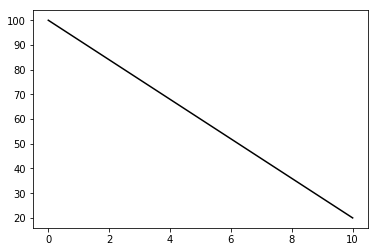

In [2]:
N = 10
L = 10.
T0 = 100.
T1 = 20.
x_analitycal = np.linspace(0., 1, N) * L
A = (T1 - T0) / L
B = T0

analytical_solution = A * x_analitycal + B
plt.plot(x_analitycal, analytical_solution, color='black')
plt.show()

### Numerical Solution

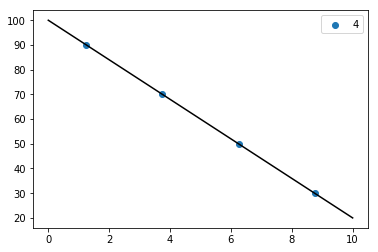

In [4]:
size = 4
num_method = FiniteVolume(size)
num_method.AssemblyLinearSystem()
temp = num_method.Solve()
plt.scatter(num_method._x, temp, label=str(size))

plt.plot(x_analitycal, analytical_solution, color='black')

plt.legend()
plt.show()

### Evaluating grid refinement

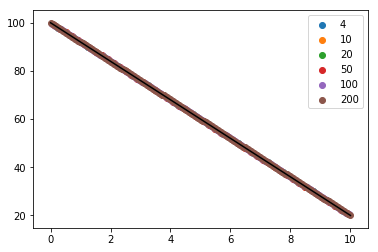

In [5]:
for size in [4, 10, 20, 50, 100, 200]:
    num_method = FiniteVolume(size)
    num_method.AssemblyLinearSystem()
    temp = num_method.Solve()
    plt.scatter(num_method._x, temp, label=str(size))

plt.plot(x_analitycal, analytical_solution, color='black')

plt.legend()
plt.show()

## Constant Source Term = 2 e Dirichlet boundary condition

### Analytical Solution

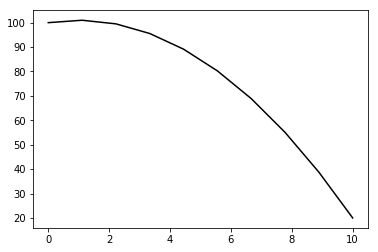

In [6]:
source_term = lambda x : 2. + 0. * x
A = -1.
B = (T1 - T0) / L + L
C = T0
analytical_solution = A * x_analitycal * x_analitycal + B * x_analitycal + C
plt.plot(x_analitycal, analytical_solution, color='black')
plt.show()

### Numerical Solution

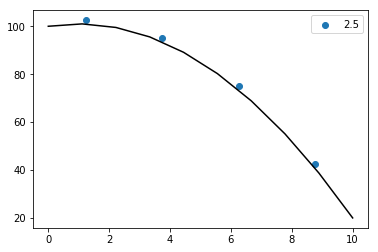

In [7]:
size = 4
num_method = FiniteVolume(size, source_term_function=source_term)
num_method.AssemblyLinearSystem()
temp = num_method.Solve()
plt.scatter(num_method._x, temp, label=str(num_method._delta_x))
    
plt.plot(x_analitycal, analytical_solution, color='black')

plt.legend()
plt.show()

### Evaluating grid refinement

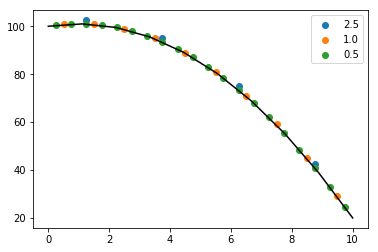

In [8]:
for size in [4, 10, 20]:
    num_method = FiniteVolume(size, source_term_function=source_term)
    num_method.AssemblyLinearSystem()
    temp = num_method.Solve()
    plt.scatter(num_method._x, temp, label=str(num_method._delta_x))
    
plt.plot(x_analitycal, analytical_solution, color='black')

plt.legend()
plt.show()

## Source Term function of x: S = 2. * x e Dirichlet boundary condition

### Analytical Solution¶

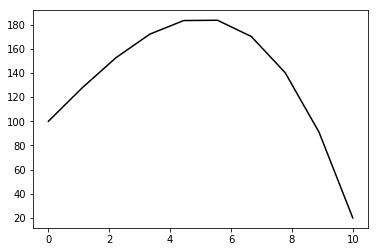

In [10]:
source_term = lambda x : 2 * x
A = - 1. / 3.
B = 0.
C = (T1 - T0) / L + L * L / 3.
D = T0
analytical_solution = A * x_analitycal ** 3 + B * x_analitycal ** 2 + C * x_analitycal + D

plt.plot(x_analitycal, analytical_solution, color='black')
plt.show()

### Numerical Solution

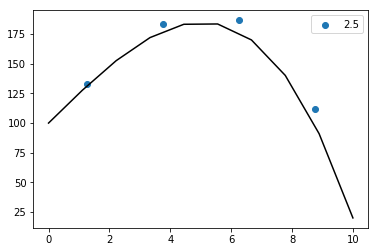

In [11]:
size = 4
num_method = FiniteVolume(size, source_term_function=source_term)
num_method.AssemblyLinearSystem()
temp = num_method.Solve()
plt.scatter(num_method._x, temp, label=str(num_method._delta_x))

plt.plot(x_analitycal, analytical_solution, color='black')

plt.legend()
plt.show()

### Evaluating grid refinement

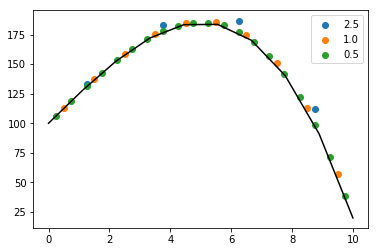

In [12]:
for size in [4, 10, 20]:
    num_method = FiniteVolume(size, source_term_function=source_term)
    num_method.AssemblyLinearSystem()
    temp = num_method.Solve()
    plt.scatter(num_method._x, temp, label=str(num_method._delta_x))

plt.plot(x_analitycal, analytical_solution, color='black')

plt.legend()
plt.show()

## Non Source Term e Neumann boundary condition

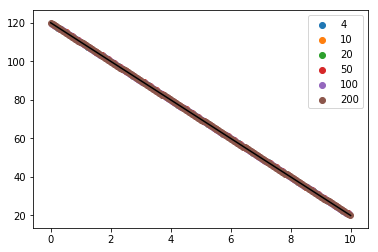

In [14]:
# Analytical
N = 10
L = 10.
k = 1.
q0 = 10.
T1 = 20.
x_array = np.linspace(0., 1, N) * L
A = - q0 / k
B = T1 + q0 * L / k
analytical_solution = A * x_array + B
plt.plot(x_analitycal, analytical_solution, color='black')

# numerical and grid refinement
for size in [4, 10, 20, 50, 100, 200]:
    num_method = FiniteVolume(
        number_of_volumes=size,
        left_boundary_condition=('Neumann', 10.),
        right_boundary_condition=('Dirichlet', 20.),
    )
    num_method.AssemblyLinearSystem()
    temp = num_method.Solve()
    plt.scatter(num_method._x, temp, label=str(size))
plt.legend()
plt.show()

## Constant Source Term S = 2. e Neumann boundary condition

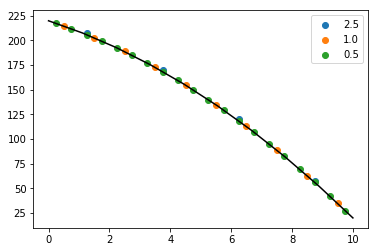

In [17]:
source_term = lambda x : 2. + 0. * x
A = -1. / k
B = - q0 / k
C = T1 + L * L / k + q0 * L / k
analytical_solution = A * x_analitycal ** 2 + B * x_analitycal + C

plt.plot(x_array, analytical_solution, color='black')

for size in [4, 10, 20]:
    num_method = FiniteVolume(
        number_of_volumes=size,
        left_boundary_condition=('Neumann', 10.),
        right_boundary_condition=('Dirichlet', 20.),
        source_term_function=source_term
    )
    num_method.AssemblyLinearSystem()
    temp = num_method.Solve()
    plt.scatter(num_method._x, temp, label=str(num_method._delta_x))
plt.legend()
plt.show()